In [2]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import box
import geodatasets
    

In [3]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).to_crs(chicago.crs)

# Create a subset of the chicago data that is just the South American continent
near_west_side = chicago[chicago["community"] == "NEAR WEST SIDE"]

# Create a custom polygon
polygon = box(-87.8, 41.90, -87.5, 42)
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=chicago.crs)

Extracting 'chicago_commpop/chicago_commpop.geojson' from 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip' to 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.prj' from 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\tiger\AppData\Local\geodatasets\geodatasets\Cache\gr

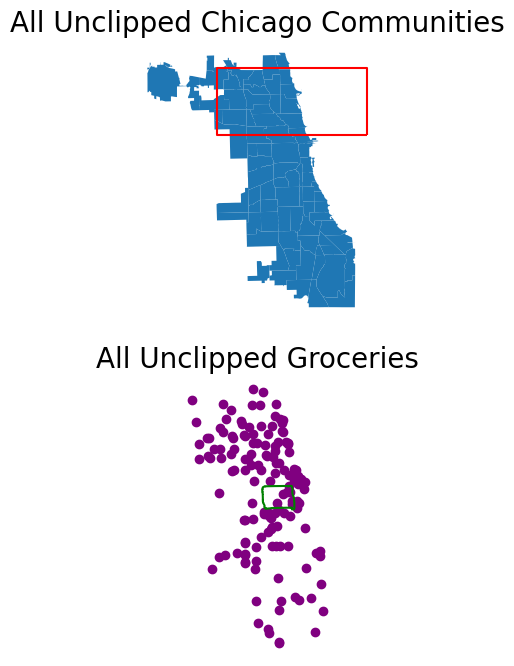

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
chicago.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
near_west_side.boundary.plot(ax=ax2, color="green")
groceries.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)
ax2.set_title("All Unclipped Groceries", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

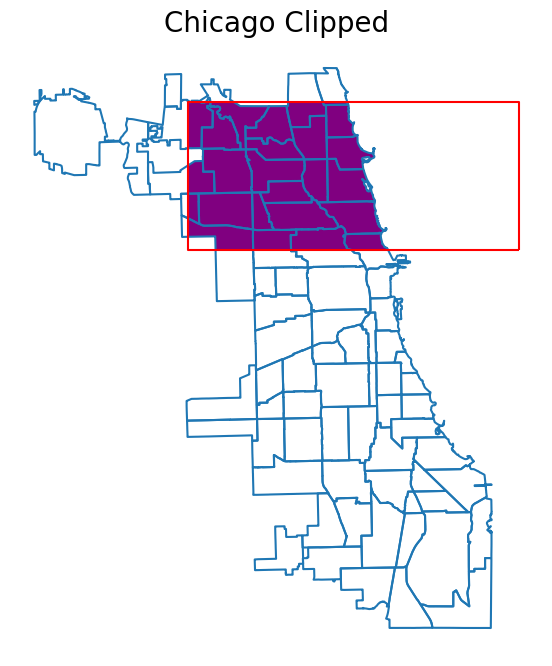

In [5]:
chicago_clipped = chicago.clip(polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the chicago
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
chicago_clipped.plot(ax=ax, color="purple")
chicago.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("Chicago Clipped", fontsize=20)
ax.set_axis_off()
plt.show() 

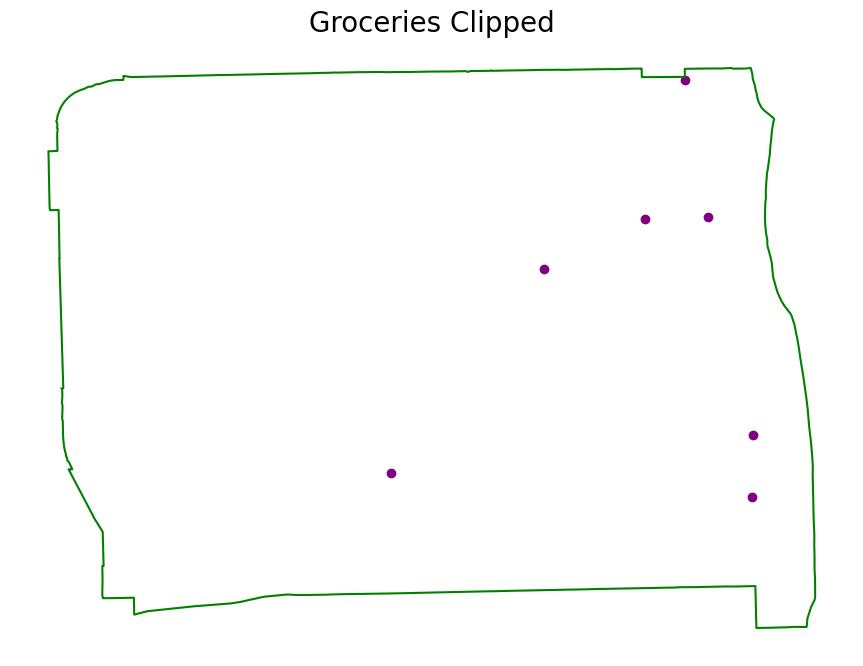

In [6]:
groceries_clipped = groceries.clip(near_west_side)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
fig, ax = plt.subplots(figsize=(12, 8))
groceries_clipped.plot(ax=ax, color="purple")
near_west_side.boundary.plot(ax=ax, color="green")
ax.set_title("Groceries Clipped", fontsize=20)
ax.set_axis_off()
plt.show()